The expressions for the frequency modulations for triangular lattice beams:
\begin{align*}
\delta \phi_1 (t) &= 0 \\
\delta \phi_2 (t) &=  +\phi_x {\rm {sin}}(\Omega t) + \phi_y {\rm{cos}}(\Omega t) = \sqrt{\phi_x^2 +\phi_y^2} {\rm{sin}}(\Omega t + \alpha) \\
\delta \nu_3 (t) &= -\phi_x {\rm {sin}}(\Omega t) + \phi_y {\rm{cos}}(\Omega t) =\sqrt{\phi_x^2 +\phi_y^2} {\rm{sin}}(\Omega t + \pi - \alpha)  \\
\alpha &= \rm{arcsin}\left(\frac{\phi_y}{\sqrt{\phi_x^2+\phi_y^2}} \right)
\end{align*}
The notation for the effective tunneling processes:
\begin{align*}
J &\equiv J_{21}^{\rm{eff}} \\
J' &\equiv J_{32}^{\rm{eff}}  = J_{13}^{\rm{eff}} \\
J &= {\rm{J_{B0}}} (K)J^{\rm{bare}}\\
J' &= {\rm{J_{B0}}} (K')J^{\rm{bare}}\\
K &= \frac{m \Omega a^2}{\hbar} \frac{\phi_y}{2 \pi} \\
K' &= \frac{m \Omega a^2}{2\hbar} \frac{\sqrt{9 \phi_x^2 + \phi_y^2}}{2 \pi}
\end{align*}
, where $ {\rm{J_{B0}}} $ means the 0-th order Bessel function of the first kind, $a = \frac{2}{3}\lambda$ the lattice constant, $m$ the atomic mass, and $\hbar$ the reduced Plant constant, respectively.

In [2]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from scipy.constants import * 
import matplotlib.pyplot as plt
from scipy.special import jv
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

numpy: 1.19.2
matplotlib: 3.3.2


In [163]:
lambda_L=1064*10**(-9) #[m]QMBD
h_bar = h/(2*np.pi) #Converted Plank constant
mrb = 87*10**(-3)/N_A #[kg] atom mass of 87Rb
a = 2/3*lambda_L
Omega = 2*np.pi*1.2*1e3 #[Hz] Shaking frequency

In [164]:
y_list = np.linspace(0, 1.5,100)*a
K_list = mrb*a*Omega/h_bar*y_list
Jv_list = jv(0, K_list)

x = np.linspace(0,1.5, 100)*a
y = np.linspace(0,1.5, 100)*a
X, Y = np.meshgrid(x, y)
Z = list(map(lambda vx, vy: jv(0,  mrb*a*Omega/(2*h_bar)*np.sqrt(9*vx**2+vy**2)), X,Y))

alpha60_x_list = np.linspace(0,np.max(x/a),100)
alpha60_y_list = 1/np.sqrt(3)*alpha60_x_list
alpha0_x_list = alpha60_x_list
alpha0_y_list = np.zeros(len(alpha0_x_list))
alpha180_x_list = np.zeros(len(y))
alpha180_y_list = np.linspace(0,np.max(y/a), len(y))

In [157]:
alpha0_x_list

array([0.        , 0.01212121, 0.02424242, 0.03636364, 0.04848485,
       0.06060606, 0.07272727, 0.08484848, 0.0969697 , 0.10909091,
       0.12121212, 0.13333333, 0.14545455, 0.15757576, 0.16969697,
       0.18181818, 0.19393939, 0.20606061, 0.21818182, 0.23030303,
       0.24242424, 0.25454545, 0.26666667, 0.27878788, 0.29090909,
       0.3030303 , 0.31515152, 0.32727273, 0.33939394, 0.35151515,
       0.36363636, 0.37575758, 0.38787879, 0.4       , 0.41212121,
       0.42424242, 0.43636364, 0.44848485, 0.46060606, 0.47272727,
       0.48484848, 0.4969697 , 0.50909091, 0.52121212, 0.53333333,
       0.54545455, 0.55757576, 0.56969697, 0.58181818, 0.59393939,
       0.60606061, 0.61818182, 0.63030303, 0.64242424, 0.65454545,
       0.66666667, 0.67878788, 0.69090909, 0.7030303 , 0.71515152,
       0.72727273, 0.73939394, 0.75151515, 0.76363636, 0.77575758,
       0.78787879, 0.8       , 0.81212121, 0.82424242, 0.83636364,
       0.84848485, 0.86060606, 0.87272727, 0.88484848, 0.89696

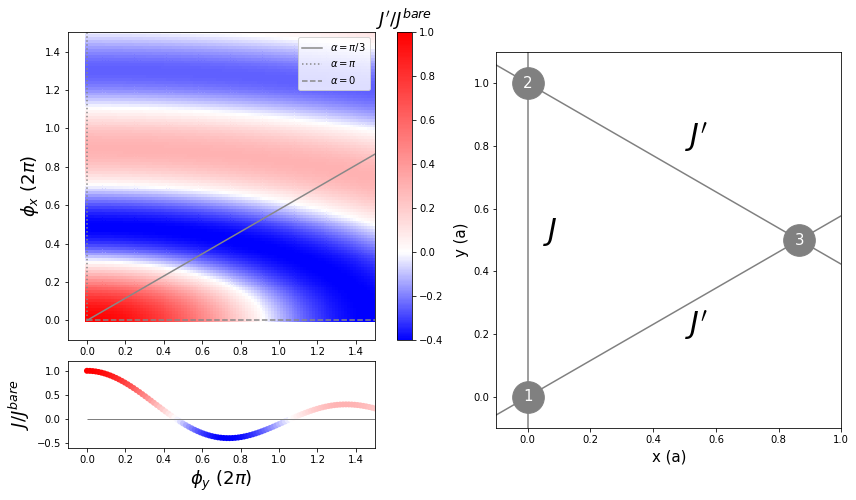

In [165]:
norm = mcolors.TwoSlopeNorm( vcenter=0.0, vmin=-0.4, vmax=1 )

fig =plt.figure(figsize=[12,7])
ax1 = fig.add_subplot(1,2,1)
mappable = ax1.pcolormesh(Y/a,X/a,Z, cmap='bwr', norm=norm, shading='Auto') 
ax1.plot(alpha60_x_list, alpha60_y_list, linestyle='-', c='#888888', label=r'$\alpha=\pi/3$')
ax1.plot(alpha180_x_list, alpha180_y_list, linestyle=':', c='#888888', label=r'$\alpha=\pi$')
ax1.plot(alpha0_x_list, alpha0_y_list, linestyle='--', c='#888888', label=r'$\alpha=0$')
ax1.set_aspect('equal')
ax1.set_xlim(-0.1, np.max(X/a))
ax1.set_ylim(-0.1, np.max(Y/a))
ax1.set_ylabel(r'$\phi_x$ $(2\pi)$', size=18)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
ax1X.scatter(y_list/a,Jv_list, c=Jv_list, cmap='bwr',lw=0, norm=norm)
ax1X.set_ylabel(r"$J / J^{bare}$", size=18)
ax1X.set_xlabel(r'$\phi_y$ $(2\pi)$',size=18)
ax1X.set_ylim(-0.6, 1.2)
ax1X.hlines(y=0,xmin=0, xmax=np.max(y_list/a), colors='gray', linewidths=1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$J'/J^{bare}$", fontsize=18)
ax1.legend()


site_position_x = np.array([0,0,np.sqrt(3)/2])
site_position_y = np.array([0,1,1/2])
text_position_x = np.array([0.05, 0.5, 0.5])
text_position_y = np.array([0.5, 0.8, 0.2])
text_list = [r"$J$", r"$J'$", r"$J'$"]
line_1_x = np.zeros(100)
line_1_y = np.linspace(-0.1,site_position_y[1]+1.1,100)
line_2_x = np.linspace(-0.2,1)
line_2_y = 1/np.sqrt(3)*line_2_x
line_3_x = line_2_x
line_3_y = -1/np.sqrt(3)*line_3_x +1

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(site_position_x, site_position_y, s = 1000, c='gray')
ax2.plot(line_1_x, line_1_y, line_2_x, line_2_y, line_3_x, line_3_y, c='gray')
ax2.set_aspect('equal')
for i in range(len(text_list)):
    ax2.text(text_position_x[i], text_position_y[i], text_list[i], fontsize = 30)
    ax2.text(site_position_x[i], site_position_y[i], str(i+1), verticalalignment="center",horizontalalignment="center", c = "white", fontsize= 15)
ax2.set_xlim(-0.1, 1)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlabel('x (a)', fontsize = 15)
ax2.set_ylabel('y (a)', fontsize = 15)
plt.tight_layout()

Using the local phase of a BEC $\theta_i$, the energy can be expressed as
\begin{equation*}
E({\theta_i}) = - \sum_{\left< i,j \right>} J_{ij} {\rm{cos}}(\theta_i - \theta_j)
\end{equation*}
Considering the above, the energy can be written in terms of tunnelings: 
\begin{equation*}
E= 
    \begin{cases}
    -J-2|J'| ,& |J'|>-2J  \\
    J+\frac{J'^2}{2J}& |J'|<-2J
    \end{cases}
\end{equation*}

In [166]:
number_of_points = 200
j_meshgrid, jp_meshgrid = np.meshgrid(np.linspace(-1,1,number_of_points), np.linspace(-1,1,number_of_points))
energy =np.zeros((number_of_points,number_of_points))
for i in range(number_of_points):
    for j in range(number_of_points):
        if np.abs(jp_meshgrid[i,j]) > -2*j_meshgrid[i,j]:
            energy[i,j] = -j_meshgrid[i,j]-2*np.abs(jp_meshgrid[i,j])
        else:
            energy[i,j] = j_meshgrid[i,j]+jp_meshgrid[i,j]**2/(2*j_meshgrid[i,j])

phase_boundary1_x = np.linspace(-1,0,100)
phase_boundary1_y = 1/2*phase_boundary1_x
phase_boundary2_x = np.linspace(0,1,100)
phase_boundary2_y = -1/2*phase_boundary2_x

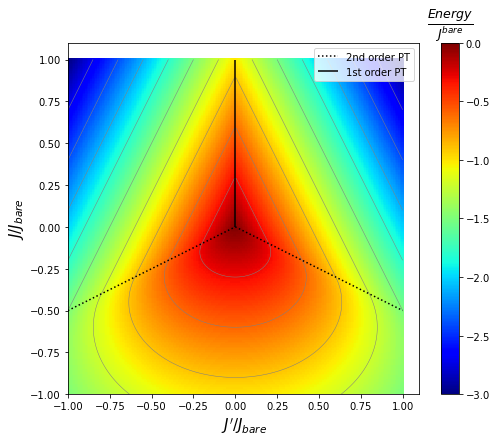

In [173]:
norm_for_phase_diagram = mcolors.TwoSlopeNorm( vcenter=-1.5, vmin=-3.0, vmax=0 )

fig =plt.figure(figsize=[7,7])
ax1 = fig.add_subplot(1,1,1)
mappable = ax1.pcolormesh(jp_meshgrid,j_meshgrid,energy,norm=norm_for_phase_diagram,cmap='jet', shading='Auto') 
ax1.contour(jp_meshgrid,j_meshgrid,energy,linestyles='-', linewidths = 0.5, colors='gray', levels = 10)
ax1.vlines(x=0, ymin=0, ymax=1, colors='black', linestyles='-', linewidths=1.5, label= "1st order PT")
ax1.plot(phase_boundary1_x, phase_boundary1_y, color='black', linestyle=':', linewidth=1.5)
ax1.plot(phase_boundary2_x, phase_boundary2_y, color='black', linestyle=':', linewidth=1.5, label="2nd order PT")
ax1.set_aspect('equal')
ax1.set_xlim(-1.0, 1.1)
ax1.set_ylim(-1.0, 1.1)
ax1.set_xlabel(r'$J^{\prime}/J_{bare}$', fontsize= 15)
ax1.set_ylabel(r'$J/J_{bare}$', fontsize= 15)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$\frac{Energy}{J^{bare}}$", fontsize=18)
ax1.legend()

In [183]:
tunneling_parameters_list = np.array([[1,1], [0, 1], [-0.4,1], [-0.4,-0.4], [0,-0.4],[0.38,-0.38],[0,0]])
phase_parameters_list = np.array([[0,0], [0, 0.3],[0,0.5], [0.75,0.44], [0.7,0.2],[0.65,0],[0.46,0.27]])
marker_list = ["h","x","d", "*","p","^","."]
marker_size_list = [150, 150, 150, 150,150, 150,250]
color_list = ["#55dd55", "#333333", "#6666dd", "#dd6666", "#ddaaaa", "yellow","gray"]
label_list = ["Ferro","1D chain","Rhombic","Spiral1","Staggered \n 1D chain", "Spiral2", "MI"]

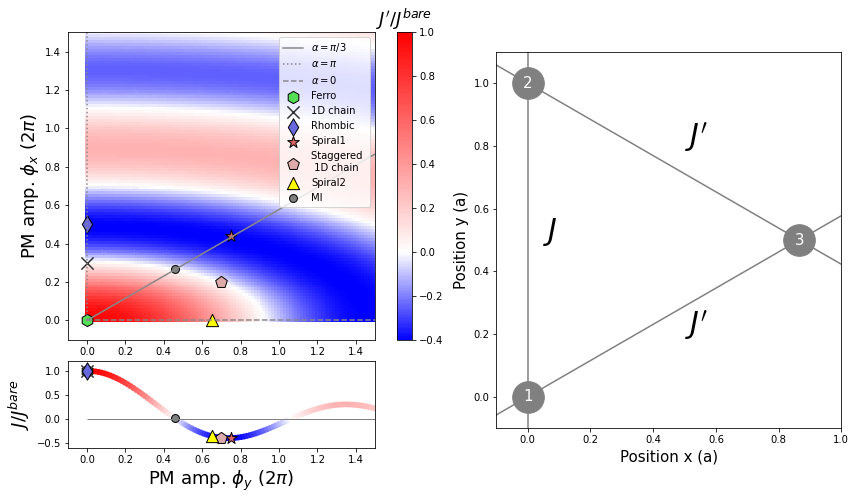

In [184]:
fig =plt.figure(figsize=[12,7])
ax1 = fig.add_subplot(1,2,1)
mappable = ax1.pcolormesh(Y/a,X/a,Z, cmap='bwr', norm=norm, shading='Auto')
ax1.plot(alpha60_x_list, alpha60_y_list, linestyle='-', c='#888888', label=r'$\alpha=\pi/3$')
ax1.plot(alpha180_x_list, alpha180_y_list, linestyle=':', c='#888888', label=r'$\alpha=\pi$')
ax1.plot(alpha0_x_list, alpha0_y_list, linestyle='--', c='#888888', label=r'$\alpha=0$')
ax1.set_aspect('equal')
ax1.set_xlim(-0.1, np.max(X/a))
ax1.set_ylim(-0.1, np.max(Y/a))
ax1.set_ylabel(r'PM amp. $\phi_x$ $(2\pi)$', size=18)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
ax1X.scatter(y_list/a,Jv_list, c=Jv_list, cmap='bwr',lw=0, norm=norm)
ax1X.set_ylabel(r"$J / J^{bare}$", size=18)
ax1X.set_xlabel(r'PM amp. $\phi_y$ $(2\pi)$',size=18)
ax1X.set_ylim(-0.6, 1.2)
ax1X.hlines(y=0,xmin=0, xmax=np.max(y_list/a), colors='gray', linewidths=1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$J'/J^{bare}$", fontsize=18)
for i in range(len(marker_list)):
    ax1.scatter(phase_parameters_list[i][0], phase_parameters_list[i][1], c=color_list[i], edgecolors = "black", marker=marker_list[i], s = marker_size_list[i], label=label_list[i])
    ax1X.scatter(phase_parameters_list[i][0], jv(0,mrb*a*Omega/h_bar*phase_parameters_list[i][0]*a), c=color_list[i], edgecolors="black", marker=marker_list[i], s = marker_size_list[i])
ax1.legend(loc ='upper right')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(site_position_x, site_position_y, s = 1000, c='gray')
ax2.plot(line_1_x, line_1_y, line_2_x, line_2_y, line_3_x, line_3_y, c='gray')
ax2.set_aspect('equal')
for i in range(len(text_list)):
    ax2.text(text_position_x[i], text_position_y[i], text_list[i], fontsize = 30)
    ax2.text(site_position_x[i], site_position_y[i], str(i+1), verticalalignment="center",horizontalalignment="center", c = "white", fontsize= 15)
ax2.set_xlim(-0.1, 1)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlabel('Position x (a)', fontsize = 15)
ax2.set_ylabel('Position y (a)', fontsize = 15)
plt.tight_layout()

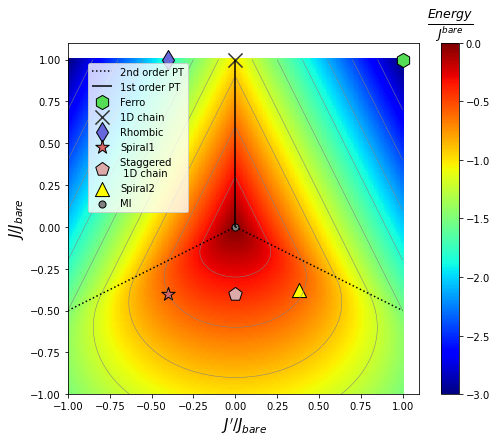

In [180]:
fig =plt.figure(figsize=[7,7])
ax1 = fig.add_subplot(1,1,1)
mappable = ax1.pcolormesh(jp_meshgrid,j_meshgrid,energy,norm=norm_for_phase_diagram,cmap='jet', shading='Auto') 
ax1.contour(jp_meshgrid,j_meshgrid,energy,linestyles='-', linewidths = 0.5, colors='gray', levels = 10)
ax1.vlines(x=0, ymin=0, ymax=1, colors='black', linestyles='-', linewidths=1.5, label= "1st order PT")
ax1.plot(phase_boundary1_x, phase_boundary1_y, color='black', linestyle=':', linewidth=1.5)
ax1.plot(phase_boundary2_x, phase_boundary2_y, color='black', linestyle=':', linewidth=1.5, label="2nd order PT")
ax1.set_aspect('equal')
ax1.set_xlim(-1.0, 1.1)
ax1.set_ylim(-1.0, 1.1)
ax1.set_xlabel(r'$J^{\prime}/J_{bare}$', fontsize= 15)
ax1.set_ylabel(r'$J/J_{bare}$', fontsize= 15)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$\frac{Energy}{J^{bare}}$", fontsize=18)
for i in range(len(marker_list)):
    ax1.scatter(tunneling_parameters_list[i][0], tunneling_parameters_list[i][1], c=color_list[i], edgecolors = "black", marker=marker_list[i], s = 200, label=label_list[i])
    ax1X.scatter(tunneling_parameters_list[i][0], jv(0,tunneling_parameters_list[i][0]), c=color_list[i], edgecolors="black", marker=marker_list[i], s = 200)
ax1.legend(loc='upper left', borderaxespad=2, fontsize =10)
